# Read Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'Comment', 'neg', 'neu', 'pos', 'compound', 'Sentiment'], dtype='object')

In [4]:
data

,Unnamed: 0,Comment,neg,neu,pos,compound,Sentiment
0,0,chris watching them eat food why are we still ...,0.127,0.873,0.000,-0.5423,Negative
1,1,NaN,0.000,0.000,0.000,0.0000,Neutral
2,2,a,0.000,0.000,0.000,0.0000,Neutral
3,3,noted,0.000,1.000,0.000,0.0000,Neutral
4,4,cuando en espanol,0.000,1.000,0.000,0.0000,Neutral
...,...,...,...,...,...,...,...
581995,581995,dongyangin ggyeoissneungeo kingbadne jeosaeggi...,0.000,1.000,0.000,0.0000,Neutral
581996,581996,plz come to bhangarh,0.000,0.698,0.302,0.0772,Positive
581997,581997,i got brawl stars and it is very fun,0.000,0.661,0.339,0.5563,Positive
581998,581998,NaN,0.000,0.000,0.000,0.0000,Neutral


In [5]:
data.drop(['Unnamed: 0', 'neg', 'neu', 'pos', 'compound'], axis=1, inplace=True)

In [6]:
data

,Comment,Sentiment
0,chris watching them eat food why are we still ...,Negative
1,NaN,Neutral
2,a,Neutral
3,noted,Neutral
4,cuando en espanol,Neutral
...,...,...
581995,dongyangin ggyeoissneungeo kingbadne jeosaeggi...,Neutral
581996,plz come to bhangarh,Positive
581997,i got brawl stars and it is very fun,Positive
581998,NaN,Neutral


In [7]:
data.dropna(inplace=True)

# Data Cleaning

In [8]:
import nltk
import time

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [9]:
def lemmatize_text(text):
    comment = " ".join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])
    
    if len(comment.replace(" ", "")) > 0:
        return comment
    
    return None

In [10]:
data["Comment"]=data["Comment"].astype(str)

In [11]:
start_time = time.time()
data["Comment"] = data["Comment"].apply(lambda text: lemmatize_text(text))
end_time = time.time()
print(f'Total Time Taken {end_time - start_time}s')

Total Time Taken 13.331225633621216s


In [12]:
data

,Comment,Sentiment
0,chris watching them eat food why are we still ...,Negative
2,a,Neutral
3,noted,Neutral
4,cuando en espanol,Neutral
5,primero,Neutral
...,...,...
581994,this is the laziest and sloppiest ive ever see...,Negative
581995,dongyangin ggyeoissneungeo kingbadne jeosaeggi...,Neutral
581996,plz come to bhangarh,Positive
581997,i got brawl star and it is very fun,Positive


In [13]:
X = data['Comment']
y = data['Sentiment']

In [14]:
np.save('LSTM/X_clean', np.array(X))
np.save('LSTM/y_clean', np.array(y))

In [15]:
# X = np.load('X_clean.npy', allow_pickle=True)
# y = np.load('y_clean.npy', allow_pickle=True)

# Train Test Split - Imbalanced Dataset

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

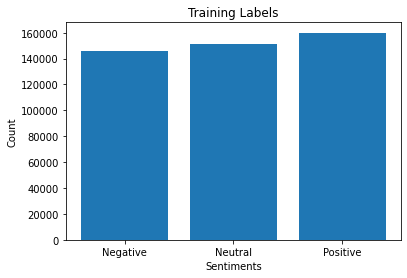

In [17]:
labels, count = np.unique(y_train, return_counts=True)
plt.bar(labels, count)
plt.title('Training Labels')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

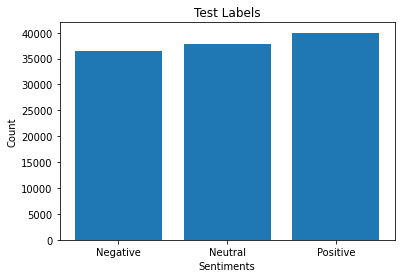

In [18]:
labels, count = np.unique(y_test, return_counts=True)
plt.bar(labels, count)
plt.title('Test Labels')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

# Word Embeddings - Keras Tokenizer

## Tokenizer

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
print(f'X_train shape: {X_train.shape}\n\nX_train type: {type(X_train)}\n\nX_train: \n{X_train}')

X_train shape: (456694,)

X_train type: <class 'pandas.core.series.Series'>

X_train: 
289169                                      this is amazing
21672         i feel bad for karl am so mad at you mr beast
465047    no way mrbeast is my favorite youtuber thank y...
316186    this would be more funnier if the elimated peo...
542880                                                  god
                                ...                        
226737                                           subscribed
471449    it would have been better if you just left him...
574846                                               gtbygb
410398    mrbeast is the best youtuber ever on the plane...
43536       wow the production level of this is insane prop
Name: Comment, Length: 456694, dtype: object


In [21]:
print(f'X_test shape: {X_test.shape}\n\nX_test type: {type(X_test)}\n\nX_test: \n{X_test}')

X_test shape: (114174,)

X_test type: <class 'pandas.core.series.Series'>

X_test: 
571372                            im so proud of my country
355494                                           rip camera
548323    beastwhat stupid stuff should i send dream mec...
83502                                                 first
21589                                             oh my god
                                ...                        
251133                             send dream chandler poop
336772                                               legend
579820                                  im a minecraft noob
110176                                        can he breath
248397    the way mrbeast said pizza i thought it would ...
Name: Comment, Length: 114174, dtype: object


In [22]:
start_time = time.time()

tokenizer = Tokenizer()

tokenizer.fit_on_texts(np.append(X_train, X_test))

maximum_length_keras = max([len(comment.split()) for comment in np.append(X_train, X_test)])

vocab_length_keras = len(tokenizer.word_index) + 1

X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

X_train_tokens = pad_sequences(X_train_tokens, maxlen=maximum_length_keras, padding='post')
X_test_tokens = pad_sequences(X_test_tokens, maxlen=maximum_length_keras, padding='post')

end_time = time.time()
print(f'Total Time Taken {end_time - start_time}s')

Total Time Taken 11.257979393005371s


In [23]:
print(f'X_train_tokens shape: {X_train_tokens.shape}\n\nX_train_tokens type: {type(X_train_tokens)}\n\nX_train_tokens: \n{X_train_tokens}')

X_train_tokens shape: (456694, 2100)

X_train_tokens type: <class 'numpy.ndarray'>

X_train_tokens: 
[[    7     5   110 ...     0     0     0]
 [    1   179   122 ...     0     0     0]
 [   23   169    22 ...     0     0     0]
 ...
 [89576     0     0 ...     0     0     0]
 [   22     5     2 ...     0     0     0]
 [   88     2   940 ...     0     0     0]]


In [24]:
print(f'X_test_tokens shape: {X_test_tokens.shape}\n\nX_test_tokens type: {type(X_test_tokens)}\n\nX_test_tokens: \n{X_test_tokens}')

X_test_tokens shape: (114174, 2100)

X_test_tokens type: <class 'numpy.ndarray'>

X_test_tokens: 
[[   28    18   992 ...     0     0     0]
 [  281   223     0 ...     0     0     0]
 [14442   261   370 ...     0     0     0]
 ...
 [   28     3   194 ...     0     0     0]
 [   32    20   599 ...     0     0     0]
 [    2   169    22 ...     0     0     0]]


In [25]:
print(f'Vocab Lengh: {vocab_length_keras}\nMaximum Length: {maximum_length_keras}')

Vocab Lengh: 102612
Maximum Length: 2100


In [26]:
import pickle

# saving
with open('LSTM/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # loading
# with open('data/tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

In [27]:
np.save('LSTM/keras_embeddings_train', X_train_tokens)
np.save('LSTM/keras_embeddings_test', X_test_tokens)

## One Hot Encoding

In [28]:
print(f'y_train shape: {y_train.shape}\n\ny_train type: {type(y_train)}\n\ny_train: \n{y_train}')

y_train shape: (456694,)

y_train type: <class 'pandas.core.series.Series'>

y_train: 
289169    Positive
21672     Negative
465047    Positive
316186    Negative
542880    Positive
            ...   
226737     Neutral
471449    Positive
574846     Neutral
410398    Positive
43536     Positive
Name: Sentiment, Length: 456694, dtype: object


In [29]:
print(f'y_test shape: {y_test.shape}\n\ny_test type: {type(y_test)}\n\ny_test: \n{y_test}')

y_test shape: (114174,)

y_test type: <class 'pandas.core.series.Series'>

y_test: 
571372    Positive
355494     Neutral
548323    Negative
83502      Neutral
21589     Positive
            ...   
251133    Positive
336772     Neutral
579820    Negative
110176     Neutral
248397    Negative
Name: Sentiment, Length: 114174, dtype: object


In [30]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

y_train_encoded = encoder.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_encoded = encoder.transform(np.array(y_test).reshape(-1, 1))

In [32]:
np.save('LSTM/y_train_encoded', y_train_encoded)
np.save('LSTM/y_test_encoded', y_test_encoded)

In [43]:
import joblib

# to save encoder 
joblib.dump(encoder,'LSTM/labelEncoder.joblib',compress=9)

['LSTM/labelEncoder.joblib']

In [44]:
# load it when test
# le=joblib.load('LSTM/labelEncoder.joblib')

## LSTM

In [1]:
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)

Thu Apr 21 19:05:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# from psutil import virtual_memory
# ram_gb = virtual_memory().total / 1e9
# print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

# if ram_gb < 20:
#   print('Not using a high-RAM runtime')
# else:
#   print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# !pip3 install scipy

In [48]:
# '/content/drive/My Drive/
import numpy as np
# from scipy.sparse import _csr

# X_train_tokens = np.load('/content/drive/My Drive/youtube-comment-analysis/keras_embeddings_train.npy', allow_pickle=True)
# y_train_encoded = np.load('/content/drive/My Drive/youtube-comment-analysis/y_train_encoded.npy', allow_pickle=True)
# X_test_tokens = np.load('/content/drive/My Drive/youtube-comment-analysis/keras_embeddings_test.npy', allow_pickle=True)
# y_test_encoded = np.load('/content/drive/My Drive/youtube-comment-analysis/y_test_encoded.npy', allow_pickle=True)

X_train_tokens = np.load('LSTM/keras_embeddings_train.npy', allow_pickle=True)
y_train_encoded = np.load('LSTM/y_train_encoded.npy', allow_pickle=True)
X_test_tokens = np.load('LSTM/keras_embeddings_test.npy', allow_pickle=True)
y_test_encoded = np.load('LSTM/y_test_encoded.npy', allow_pickle=True)

In [49]:
VOCAB = 102612
EMBEDDINGS = 100
MAXIMUM_LENTH = 2100

In [50]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU, Bidirectional
from keras.layers.embeddings import Embedding

In [51]:
lstm = Sequential()
lstm.add(Embedding(VOCAB, EMBEDDINGS, input_length=MAXIMUM_LENTH))
# lstm.add(GRU(activation='tanh', units=32, dropout=0.2))
lstm.add(Bidirectional(LSTM(128, return_sequences=True)))
lstm.add(Bidirectional(LSTM(64)))
lstm.add(Dense(64, activation='relu'))
lstm.add(Dense(64, activation='relu'))
lstm.add(Dense(3, activation='softmax'))

In [52]:
lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2100, 100)         10261200  
                                                                 
 bidirectional (Bidirectiona  (None, 2100, 256)        234496    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 1

In [54]:
lstm.fit(X_train_tokens, y_train_encoded, batch_size=64, epochs=3, validation_data=(X_test_tokens, y_test_encoded))

Epoch 1/3
7136/7136 [==============================] - 2378s 332ms/step - loss: 0.1190 - accuracy: 0.9577 - val_loss: 0.0566 - val_accuracy: 0.9814
Epoch 2/3
7136/7136 [==============================] - 2343s 328ms/step - loss: 0.0413 - accuracy: 0.9861 - val_loss: 0.0543 - val_accuracy: 0.9822
Epoch 3/3
7136/7136 [==============================] - 2349s 329ms/step - loss: 0.0291 - accuracy: 0.9901 - val_loss: 0.0548 - val_accuracy: 0.9833


In [55]:
lstm.save('LSTM/model_lstm.h5')

In [56]:
lstm.save_weights('LSTM/model_lstm_weights.h5')

In [57]:
# lstm = load_model('LSTM/model_lstm.h5')

In [ ]:
# model.load_weights('LSTM/model_lstm_weights.h5')

In [9]:
lstm.predict(X_test_tokens)

array([[0.9867465 , 0.00103574, 0.01221779],
       [0.7764331 , 0.0055568 , 0.21801011],
       [0.97494704, 0.00329035, 0.02176264],
       ...,
       [0.00179619, 0.9944047 , 0.00379911],
       [0.00259886, 0.00541325, 0.99198794],
       [0.00265838, 0.00565192, 0.9916897 ]], dtype=float32)